<a href="https://colab.research.google.com/github/githubshathik/Assignment-10-16/blob/shathik/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
data=pd.read_csv('/content/Social_Network_Ads (1).csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
from sklearn import preprocessing 

data["Gender"]=data[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)

In [8]:
data=data.drop(columns="User ID")
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


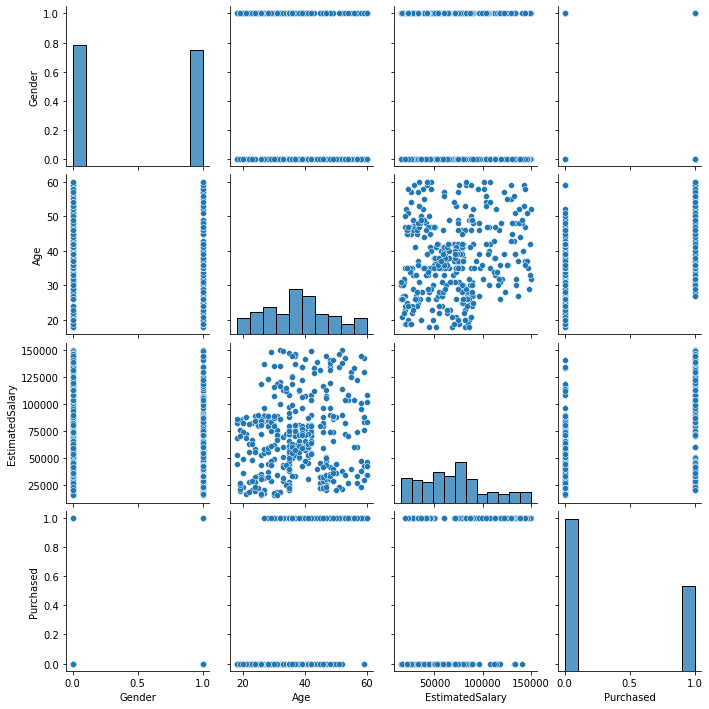

In [9]:
import seaborn as sns
sns.pairplot(data)

In [14]:
t=data.groupby(["Gender"])['EstimatedSalary'].median()
t

Gender
0    70500
1    68000
Name: EstimatedSalary, dtype: int64

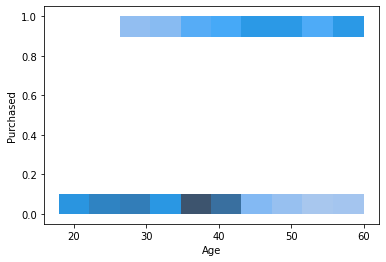

In [15]:
sns.histplot(x=data["Age"],y=data["Purchased"])

In [16]:
X=data.drop(columns="Purchased")
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [17]:
Y=data["Purchased"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [18]:
# Input Data
# X = features

# Output Data
# Y = Purchased


# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and reprecated to model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,random_state = 5)

print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

xtrain shape :  (320, 3)
xtest shape :  (80, 3)
ytrain shape :  (320,)
ytest shape :  (80,)


**Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
X_train_scaled = scaler.fit_transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

**Fitting Random Forest to the Training set**

In [21]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, Y_train)



RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [22]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [23]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9000


In [28]:
# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Age                0.524908
EstimatedSalary    0.464474
Gender             0.010618
dtype: float64

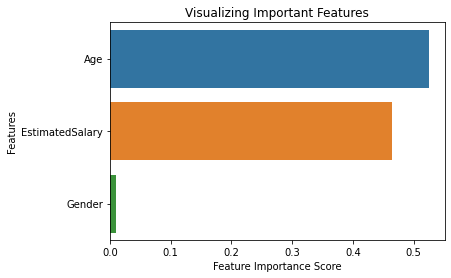

In [29]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

**Making the Confusion Matrix**

In [30]:

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[48  5]
 [ 3 24]]

True Positives(TP) =  48

True Negatives(TN) =  24

False Positives(FP) =  5

False Negatives(FN) =  3


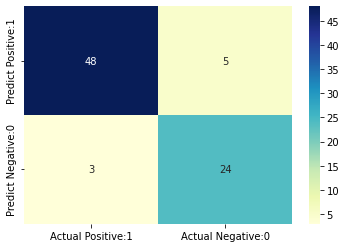

In [31]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [32]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.83      0.89      0.86        27

    accuracy                           0.90        80
   macro avg       0.88      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



**Visualising the Training set results**

Train set auc: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


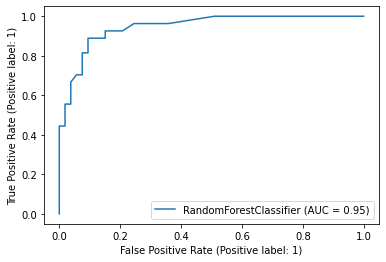

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily
# Compute test set accuracy
acc = accuracy_score(Y_test, y_pred)

print("Train set auc: {:.2f}".format(acc))
plot_roc_curve(rfc, X_test, Y_test)

**Visualising the Test set results**

In [35]:
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(Y_test, y_pred)

Test set accuracy: 0.90
